In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split


In [5]:
df_train=pd.read_csv("train.csv")
df_train.head()
df_test=pd.read_csv("test.csv")


In [6]:
df_train.columns=["polarity","title","text"]
df_test.columns=["polarity","title","text"]

In [7]:
train=df_train
test=df_test


In [12]:
# train.drop(["title"],axis=1,inplace=True)
train=df_train.sample(100000,random_state=99)
train.head()

,polarity,text
2136295,2,"Yes, go ahead and laugh. But some of the other..."
2620775,2,"Wow,This movie is a classic. Family movie by a..."
1588872,1,I THOUGHT APPLE WAS USER FRIENDLY???????? I GU...
3125694,2,I bought this book after joining Curves. It he...
1668956,1,The first ten minutes of the film passed with ...


In [13]:
# test.drop(["title"],axis=1,inplace=True)
test=df_test.sample(100000,random_state=99)
test.head()

,polarity,text
110227,1,I met the author of this book/software at a wr...
118016,1,I bought this book several years ago and it wa...
180926,1,I have had two of these units and both worked ...
121412,1,Really liked the Mobiblue 1500 cube at first -...
128565,1,This trilogy was recommended to me and I was s...


In [14]:
train['polarity'] = train['polarity'].apply(lambda x: 0 if x == 2 else 1)
test['polarity'] = test['polarity'].apply(lambda x: 0 if x == 2 else 1)
# 0 is positive
# 1 is negative

In [18]:
def clean_text(df, field):
    df[field] = df[field].str.replace(r"@"," at ")
    df[field] = df[field].str.replace("#[^a-zA-Z0-9_]+"," ")
    df[field] = df[field].str.replace(r"[^a-zA-Z(),\"'\n_]"," ")
    df[field] = df[field].str.replace(r"http\S+","")
    df[field] = df[field].str.lower()
    return df

clean_text(train,"text")
clean_text(test,"text")

,polarity,text
110227,1,i met the author of this book/software at a wr...
118016,1,i bought this book several years ago and it wa...
180926,1,i have had two of these units and both worked ...
121412,1,really liked the mobiblue 1500 cube at first -...
128565,1,this trilogy was recommended to me and i was s...
...,...,...
320949,0,yep... lot of spoons and very very quickly! we...
234926,1,one of the reasons i bought this book is for t...
252627,0,i ordered the aquamarine ring for my daughter ...
267494,1,"in all, jewel's book is not bad. the quality o..."


In [21]:
import nltk
import re
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
def preprocess_train_text(x):
    corpus=[]
    for i in range(0,100000):
        review=re.sub("^a-zA-Z"," ",x.iloc[i]["text"])
        review=review.lower()
        review=review.split()
        ps=PorterStemmer()
        all_stopwords=stopwords.words("English")
        all_stopwords.remove("not")
        review=[ps.stem(word) for word in review if not word in set(all_stopwords)] #remove words which wont help us 
        review=" ".join(review)
        corpus.append(review)
        
    return corpus
    
def preprocess_test_text(x):
    corpus=[]
    for i in range(0,100000):
        review=re.sub("^a-zA-Z"," ",x.iloc[i]["text"])
        review=review.lower()
        review=review.split()
        ps=PorterStemmer()
        all_stopwords=stopwords.words("English")
        all_stopwords.remove("not")
        review=[ps.stem(word) for word in review if not word in set(all_stopwords)] #remove words which wont help us 
        review=" ".join(review)
        corpus.append(review)
        
    return corpus
    


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ihars\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
train_corpus=preprocess_train_text(train)
test_corpus=preprocess_test_text(test)

In [24]:
from collections import Counter
cnt = Counter()
for text in train_corpus:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(20) 

[('not', 53916),
 ('book', 42166),
 ('one', 30846),
 ('like', 29588),
 ('get', 22924),
 ('would', 22457),
 ('use', 20634),
 ('read', 19958),
 ('good', 19214),
 ('great', 17932),
 ('love', 15684),
 ('make', 14777),
 ('time', 14678),
 ('realli', 14401),
 ('work', 14257),
 ('it.', 13541),
 ('even', 13027),
 ('look', 12518),
 ('buy', 12340),
 ('movi', 12224)]

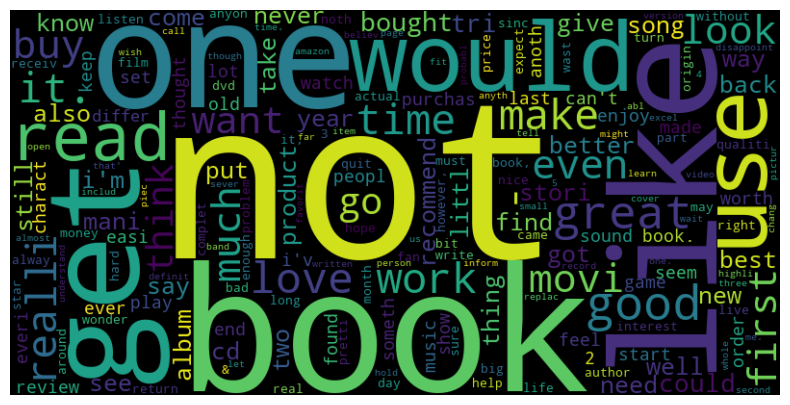

In [25]:
from wordcloud import WordCloud
word_freq = dict(cnt)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [28]:
def remove_freqwords(text):
    return " ".join([word for word in str(text).split() if word not in {'book','would','read','it.'}])

train_corpus = [remove_freqwords(text) for text in train_corpus]
test_corpus = [remove_freqwords(text) for text in test_corpus]

In [30]:
from collections import Counter
cnt = Counter()
for text in train_corpus:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(20) 

[('not', 53916),
 ('one', 30846),
 ('like', 29588),
 ('get', 22924),
 ('use', 20634),
 ('good', 19214),
 ('great', 17932),
 ('love', 15684),
 ('make', 14777),
 ('time', 14678),
 ('realli', 14401),
 ('work', 14257),
 ('even', 13027),
 ('look', 12518),
 ('buy', 12340),
 ('movi', 12224),
 ('first', 11984),
 ('much', 11826),
 ('want', 11419),
 ('go', 10616)]

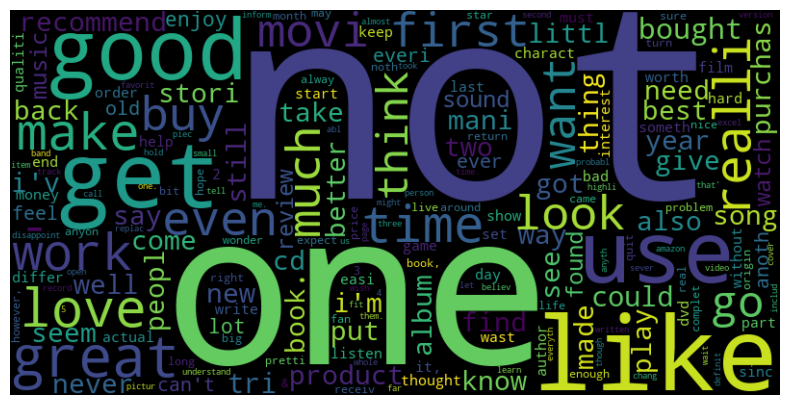

In [31]:
from wordcloud import WordCloud
word_freq = dict(cnt)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Text(0, 0.5, 'Text Length')

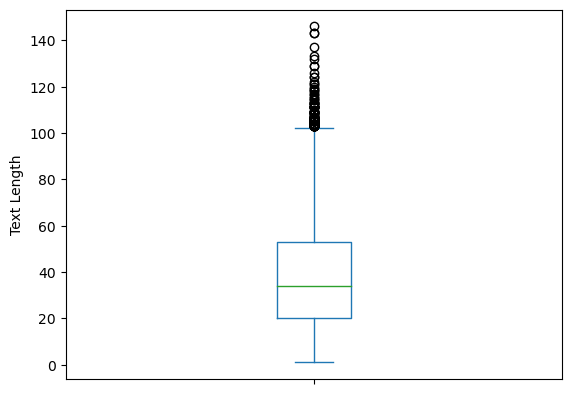

In [36]:
text_len = pd.Series([len(review.split()) for review in train_corpus])
text_len.plot(kind="box")
plt.ylabel("Text Length")

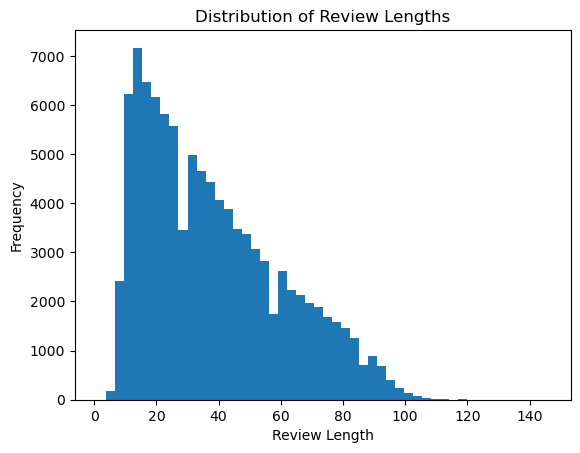

In [56]:
import matplotlib.pyplot as plt

review_lengths = [len(review.split()) for review in train_corpus]
plt.hist(review_lengths, bins=50)
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths')
plt.show()

In [57]:
max_len = int(np.percentile(text_len, 95))
max_features = 1800
print(max_len)

81


In [49]:
X_train=train_corpus
X_test=test_corpus
y_train=train.iloc[:,0].values
y_test=test.iloc[:,0].values

In [40]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [41]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_r)


In [43]:
# using tokenizer to transform text messages into training and testing set
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [44]:
X_train_seq_padded = pad_sequences(X_train_seq, maxlen=83)
X_test_seq_padded = pad_sequences(X_test_seq, maxlen=83)

In [45]:
X_train_seq_padded = pad_sequences(X_train_seq, maxlen=64)
X_test_seq_padded = pad_sequences(X_test_seq, maxlen=64)

In [46]:
BATCH_SIZE = 64

model = Sequential()
model.add(Embedding(len(tokenizer.index_word)+1,64))
model.add(Bidirectional(LSTM(100, dropout=0,recurrent_dropout=0)))
model.add(Dense(128, activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile("adam","binary_crossentropy",metrics=["accuracy"])

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss",patience=5,verbose=True)

In [50]:
 model_rnn = model.fit(X_train_seq_padded, y_train,batch_size=BATCH_SIZE,epochs=15,
                     validation_data=(X_test_seq_padded, y_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 160s 100ms/step - accuracy: 0.7975 - loss: 0.4237 - val_accuracy: 0.8593 - val_loss: 0.3254
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 157s 101ms/step - accuracy: 0.9157 - loss: 0.2144 - val_accuracy: 0.8535 - val_loss: 0.3620
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 163s 105ms/step - accuracy: 0.9518 - loss: 0.1282 - val_accuracy: 0.8487 - val_loss: 0.4111
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 163s 105ms/step - accuracy: 0.9744 - loss: 0.0729 - val_accuracy: 0.8445 - val_loss: 0.5215
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 170s 109ms/step - accuracy: 0.9872 - loss: 0.0389 - val_accuracy: 0.8344 - val_loss: 0.6193
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 162s 103ms/step - accuracy: 0.9911 - loss: 0.0267 - val_accuracy: 0.8407 - val_loss: 0.7817
Epoch 6: early stopping


In [51]:
y_predicted_rnn_1=model.predict(X_test_seq_padded)


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step


In [58]:
from sklearn.metrics import roc_auc_score
pred_train = model.predict(X_train_seq_padded)
pred_test = model.predict(X_test_seq_padded)
print('LSTM Recurrent Neural Network baseline: ' + str(roc_auc_score(y_train, pred_train)))
print('LSTM Recurrent Neural Network: ' + str(roc_auc_score(y_test, pred_test)))

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step
LSTM Recurrent Neural Network baseline: 0.9998249848231636
LSTM Recurrent Neural Network: 0.9085969521755124


In [59]:
model.evaluate(X_test_seq_padded, y_test)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.8413 - loss: 0.7771


[0.7816770076751709, 0.8406500220298767]

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from tabulate import tabulate

max_length = 100

predictions =model.predict(X_test_seq_padded)

predicted_labels = np.round(predictions)


accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)

table = [
    ["Accuracy", accuracy],
    ["Precision", precision],
    ["Recall", recall],
    ["F1-score", f1]
]
print(tabulate(table, headers=["Metric", "Value"], tablefmt="fancy_grid"))


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step
╒═══════════╤══════════╕
│ Metric    │    Value │
╞═══════════╪══════════╡
│ Accuracy  │ 0.84065  │
├───────────┼──────────┤
│ Precision │ 0.8342   │
├───────────┼──────────┤
│ Recall    │ 0.85014  │
├───────────┼──────────┤
│ F1-score  │ 0.842095 │
╘═══════════╧══════════╛


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [66]:
# Assuming y_pred contains the predicted probabilities
y_pred_binary = (predictions > 0.5).astype(int)  # Set a threshold of 0.5

# Now you can compare y_pred_binary with y_test
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

class_report = classification_report(y_test, y_pred_binary)

print("Classification Report:\n", class_report)

Accuracy: 0.84065
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84     50020
           1       0.83      0.85      0.84     49980

    accuracy                           0.84    100000
   macro avg       0.84      0.84      0.84    100000
weighted avg       0.84      0.84      0.84    100000



In [97]:
sample_text = "very bad "
sample_seq = tokenizer.texts_to_sequences([sample_text])[0]
sample_seq_padded = pad_sequences([sample_seq], maxlen=83 ,padding='post')
prediction = model.predict(sample_seq_padded)[0][0]  
if prediction > 0.5:
    predicted_class = 0  #+ve
else:
    predicted_class = 1 #-ve

print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: 1


In [98]:
model.wv.most_similar("bad")

AttributeError: 'Sequential' object has no attribute 'wv'